<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/Tuan3_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.516163602679207


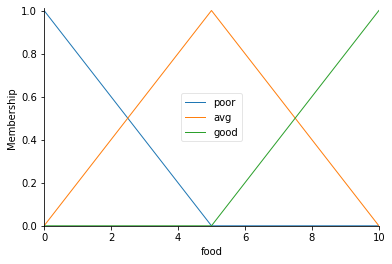

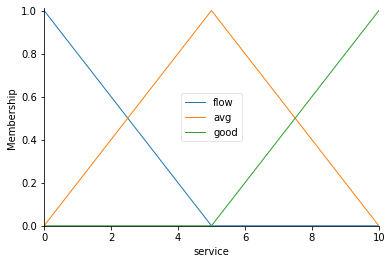

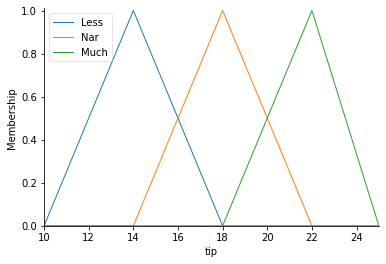

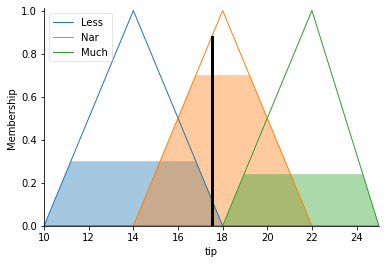

In [ ]:
#  Fuzzy: tien tip
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#  tao mang dau vao 
food =ctrl.Antecedent(np.arange(0,11,1),'food')
service =ctrl.Antecedent(np.arange(0,11,1),'service')
# tao mang dau ra
tip = ctrl.Consequent(np.arange(10,26,1),'tip')
# ve do thi tam giac food cho tung gia tri poor, avg, good 
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['avg'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,12])
# ve do thi tam giac service cho tung gia tri flow, avg, good
service['flow'] = fuzz.trimf(service.universe,[0,0,5])
service['avg'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,12])
# ve do thi tam giac tip cho tung gia tri less, nar, much
tip['Less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['Nar'] = fuzz.trimf(tip.universe,[14,18,22])
tip['Much'] = fuzz.trimf(tip.universe,[18,22,25])
# show do thi
food.view()
service.view()
tip.view()
# tip['much'].view()
# quy luat cho tip phu thuoc vao food va service
rule1 = ctrl.Rule(food['poor']&service['flow'],tip['Less'])
rule2 = ctrl.Rule(food['poor']&service['avg'],tip['Less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['Nar'])
rule4 = ctrl.Rule(food['avg']&service['flow'],tip['Less'] )
rule5 = ctrl.Rule(food['avg']&service['avg'],tip['Nar'])
rule6 = ctrl.Rule(food['avg']&service['good'],tip['Much'])
rule7 = ctrl.Rule(food['good']&service['flow'],tip['Nar'])
rule8 = ctrl.Rule(food['good']&service['avg'],tip['Much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['Much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# tinh gia tri tien tip o input va show dot thi
tipping.input['food'] = 6.2
tipping.input['service'] = 3.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


75.0


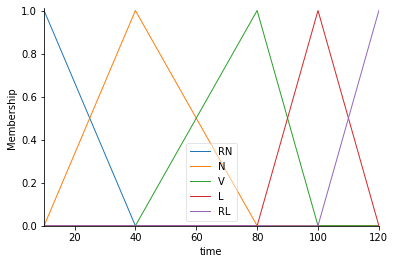

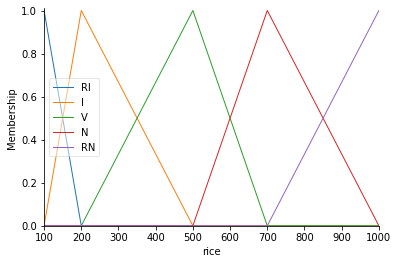

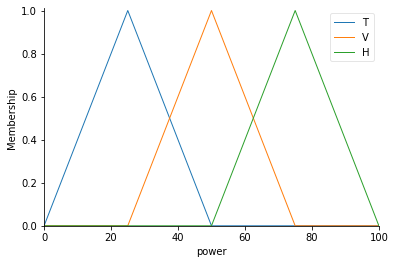

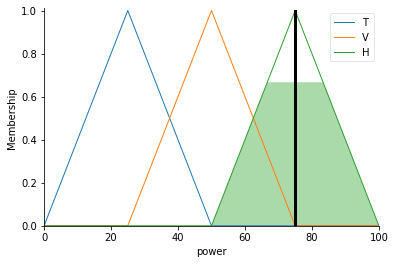

In [10]:
#  fuzzy: noi com dien
#  Fuzzy: tien tip
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#  tao mang dau vao 
time =ctrl.Antecedent(np.arange(10,121,1),'time')
rice =ctrl.Antecedent(np.arange(100,1001,1),'rice')
# tao mang dau ra
power = ctrl.Consequent(np.arange(0,101,1),'power')
# ve do thi tam giac time cho tung gia tri RN, N, V, L, RL
time['RN'] = fuzz.trimf(time.universe,[0,10,40])
time['N'] = fuzz.trimf(time.universe,[10,40,80])
time['V'] = fuzz.trimf(time.universe,[40,80,100])
time['L'] = fuzz.trimf(time.universe,[80,100,120])
time['RL'] = fuzz.trimf(time.universe,[100,120,130])
# ve do thi tam giac rice cho tung gia tri RI, I, V, N, RN
rice['RI'] = fuzz.trimf(rice.universe,[0,100,200])
rice['I'] = fuzz.trimf(rice.universe,[100,200,500])
rice['V'] = fuzz.trimf(rice.universe,[200,500,700])
rice['N'] = fuzz.trimf(rice.universe,[500,700,1000])
rice['RN'] = fuzz.trimf(rice.universe,[700,1000,1200])
# ve do thi tam giac power cho tung gia tri T, V, H
power['T'] = fuzz.trimf(power.universe,[0,25,50])
power['V'] = fuzz.trimf(power.universe,[25,50,75])
power['H'] = fuzz.trimf(power.universe,[50,75,100])
# show do thi
time.view()
rice.view()
power.view()

# quy luat cho power phu thuoc vao rice va time
rule1 =  ctrl.Rule(time['RN']&rice['RI'],power['V'])
rule2 =  ctrl.Rule(time['RN']&rice['I'],power['V'])
rule3 =  ctrl.Rule(time['RN']&rice['V'],power['H'])
rule4 =  ctrl.Rule(time['RN']&rice['N'],power['H'] )
rule5 =  ctrl.Rule(time['RN']&rice['RN'],power['H'])
rule6 =  ctrl.Rule(time['N']&rice['RI'],power['V'])
rule7 =  ctrl.Rule(time['N']&rice['I'],power['V'])
rule8 =  ctrl.Rule(time['N']&rice['V'],power['V'])
rule9 =  ctrl.Rule(time['N']&rice['N'],power['H'])
rule10 = ctrl.Rule(time['N']&rice['RN'],power['H'])
rule11 = ctrl.Rule(time['V']&rice['RI'],power['T'])
rule12 = ctrl.Rule(time['V']&rice['I'],power['V'])
rule13 = ctrl.Rule(time['V']&rice['V'],power['V'] )
rule14 = ctrl.Rule(time['V']&rice['N'],power['V'])
rule15 = ctrl.Rule(time['V']&rice['RN'],power['H'])
rule16 = ctrl.Rule(time['L']&rice['RI'],power['T'])
rule17 = ctrl.Rule(time['L']&rice['I'],power['T'])
rule18 = ctrl.Rule(time['L']&rice['V'],power['V'])
rule19 = ctrl.Rule(time['L']&rice['N'],power['V'])
rule20 = ctrl.Rule(time['L']&rice['RN'],power['V'])
rule21 = ctrl.Rule(time['RL']&rice['RI'],power['T'])
rule22 = ctrl.Rule(time['RL']&rice['I'],power['T'] )
rule23 = ctrl.Rule(time['RL']&rice['V'],power['T'])
rule24 = ctrl.Rule(time['RL']&rice['N'],power['V'])
rule25 = ctrl.Rule(time['RL']&rice['RN'],power['V'])

power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)
# tinh gia tri power o input va show dot thi
powering.input['time'] = 15
powering.input['rice'] = 900
powering.compute()
print(powering.output['power'])
power.view(sim=powering)

In [2]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=be80106860893e55f5d89b3c99a9f5324a0b752a09edea4d6646524a2a2e762b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
